<a href="https://colab.research.google.com/github/HaroonAbdullah2/Emotion-Detection-System-Roman-Urdu/blob/main/Updated%20Preprocessed%20%2B%20EDA%20%2B%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import re



### Logistic Regression

In [ ]:
df = pd.read_excel('/content/dataset new 15th july.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset new 15th july.xlsx'

In [ ]:
df.head(5)

,Sentence,Emotion,Intensity
0,Wah bhut khoob,happy,medium
1,right wqt wqt ki baat ha time same ni rhta aj ...,sad,low
2,wah wah kaya bat hai,happy,medium
3,Bohat khoob so true Alhamdulillah,happy,medium
4,Beshaq yar bohat khushi hoi mil ky,happy,high


In [ ]:
df.tail(5)

,Sentence,Emotion,Intensity
9815,"Main ek maa hun, lekin aksar mujhe mehsoos hot...",surprise,medium
9816,Mujhe sachmuch hairan hai ki woh yeh kaise kar...,surprise,low
9817,Main abhi bhi ek anubhav se thoda stunned mehs...,surprise,low
9818,Main apne rozmarra ki zimmedariyon se overwhel...,surprise,medium
9819,Main hairan hote hue sochne laga aur mehsoos k...,surprise,high


In [ ]:
df.columns = ["Sentence","Emotion","Intensity" ]

In [ ]:
df.head(10)

,Sentence,Emotion,Intensity
0,Wah bhut khoob,happy,medium
1,right wqt wqt ki baat ha time same ni rhta aj ...,sad,low
2,wah wah kaya bat hai,happy,medium
3,Bohat khoob so true Alhamdulillah,happy,medium
4,Beshaq yar bohat khushi hoi mil ky,happy,high
5,Right ha but bar bar ak hi insan q bardash kar...,anger,high
6,Right mara jasa masom log,happy,low
7,MashaAllah pyaray lg rhy,happy,medium
8,Mubarak ho bohat bohat khushi hoi,happy,high
9,Ma hun Hero tara,happy,low


In [ ]:
df.tail(10)

,Sentence,Emotion,Intensity
9811,Mujhe aaj apne outfit ki kuch tasveerein leni ...,surprise,NaN
9812,Mujhe aisa lag raha hai jaise main kisi ajeeb ...,surprise,NaN
9813,Main bahut ajeeb mehsoos kar raha hun.,surprise,NaN
9814,Main toh aise hi apne computer par playing kar...,surprise,NaN
9815,Main itna bada ho gaya hun ki graduation aur y...,surprise,NaN
9816,"Main ek maa hun, lekin aksar mujhe mehsoos hot...",surprise,NaN
9817,Mujhe sachmuch hairan hai ki woh yeh kaise kar...,surprise,NaN
9818,Main abhi bhi ek anubhav se thoda stunned mehs...,surprise,NaN
9819,Main apne rozmarra ki zimmedariyon se overwhel...,surprise,NaN
9820,Main hairan hote hue sochne laga aur mehsoos k...,surprise,NaN


In [ ]:
df.describe()

,Sentence,Emotion,Intensity
count,9820,9820,9820
unique,9370,7,4
top,bataiye sir hum kis ke pass jay aap ko tho koi...,happy,medium
freq,4,1911,4341


In [ ]:
df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
9815    False
9816    False
9817    False
9818    False
9819    False
Length: 9820, dtype: bool

In [ ]:
print(df.isnull().sum())

Sentence     0
Emotion      0
Intensity    0
dtype: int64


In [ ]:
df.shape

(9820, 3)

In [ ]:
df["Emotion"].unique()

array(['happy', 'sad', 'anger', 'surprise', 'disgust', 'neutral', 'fear'],
      dtype=object)

In [ ]:
df["Intensity"].unique()

array(['medium', 'low', 'high', 'negation'], dtype=object)

In [ ]:
df = df.drop_duplicates()

In [ ]:
def preprocess_text(text):
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"\.{2,}", ".", text)
    text = re.sub(r"\s+", " ", text)
    text = text.strip()

    return text


In [ ]:
df["Sentence"] = df["Sentence"].astype(str).apply(preprocess_text)


In [ ]:
# Assuming your preprocessed dataset is stored in a DataFrame called 'df'
df.to_excel('Updated_preprocessed_Dataset_27th_June_Tuesday.xlsx', index=False)

# Download the file
from google.colab import files
files.download('Updated_preprocessed_Dataset_27th_June_Tuesday.xlsx')


In [ ]:
from google.colab import files

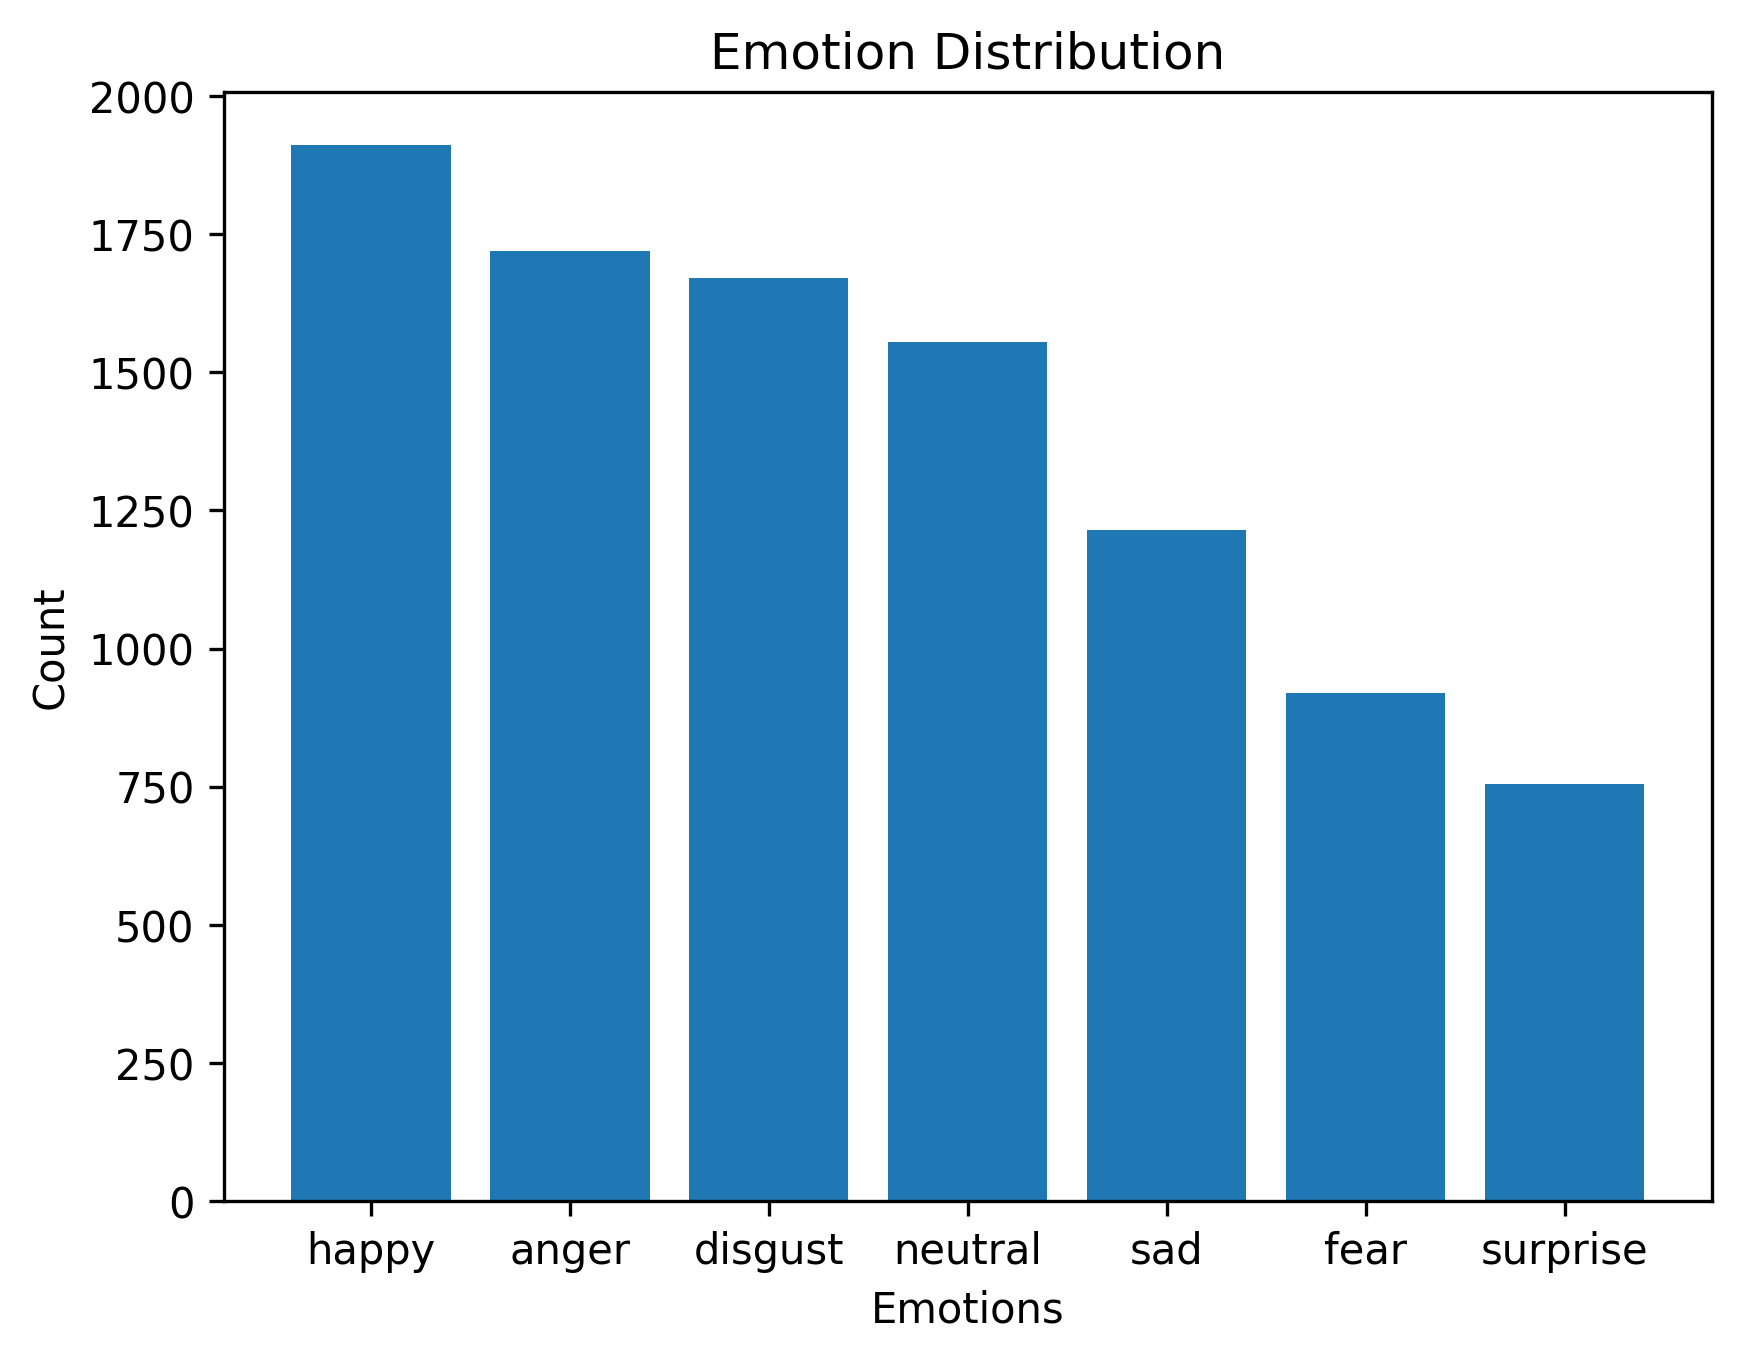

In [ ]:
emotion_counts = df['Emotion'].value_counts()
plt.bar(emotion_counts.index, emotion_counts.values)
plt.title('Emotion Distribution')
plt.xlabel('Emotions')
plt.ylabel('Count')

# Save the current figure with higher DPI
fig = plt.gcf()
fig.set_dpi(300)  # Adjust the DPI value as needed

# Set the output file path and format
output_path = 'emotion_distribution.png'
output_format = 'png'

# Save the plot with higher DPI
plt.savefig(output_path, format=output_format, dpi=fig.get_dpi())



In [ ]:
emotion_counts = df["Emotion"].value_counts()
for emotion in emotion_counts.index:
    emotion_df = df[df["Emotion"] == emotion]
    intensity_counts = emotion_df["Intensity"].value_counts()
    print("Emotion:", emotion)
    print("Emotion Count:", emotion_counts[emotion])
    print("Intensity Counts:")
    print(intensity_counts)
    print()

Emotion: happy
Emotion Count: 1911
Intensity Counts:
medium    886
low       590
high      435
Name: Intensity, dtype: int64

Emotion: anger
Emotion Count: 1720
Intensity Counts:
medium    1065
high       372
low        283
Name: Intensity, dtype: int64

Emotion: disgust
Emotion Count: 1671
Intensity Counts:
medium    977
low       377
high      317
Name: Intensity, dtype: int64

Emotion: neutral
Emotion Count: 1554
Intensity Counts:
negation    1554
Name: Intensity, dtype: int64

Emotion: sad
Emotion Count: 1215
Intensity Counts:
medium    614
high      322
low       279
Name: Intensity, dtype: int64

Emotion: fear
Emotion Count: 920
Intensity Counts:
medium    378
low       308
high      234
Name: Intensity, dtype: int64

Emotion: surprise
Emotion Count: 755
Intensity Counts:
medium    398
high      213
low       144
Name: Intensity, dtype: int64



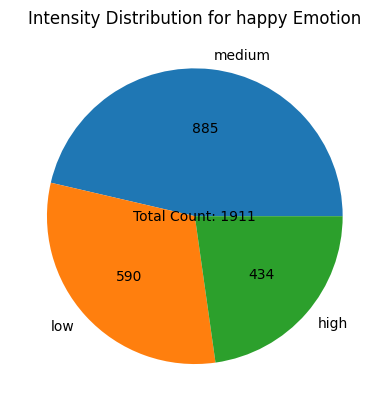

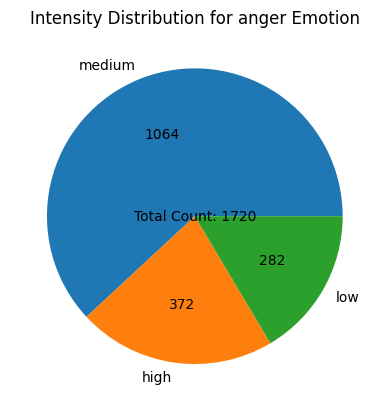

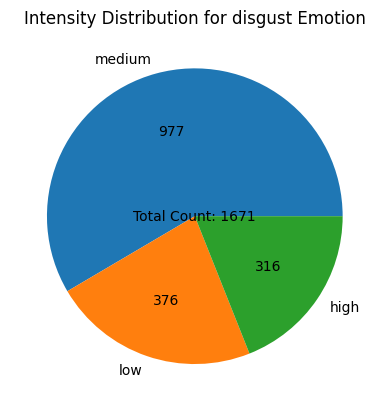

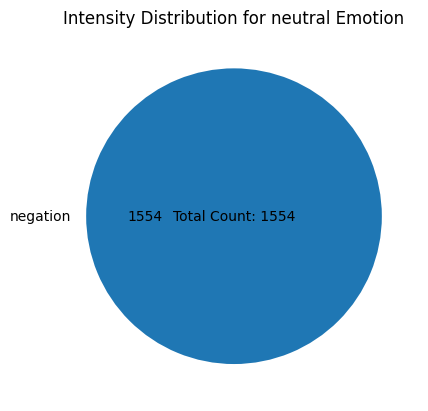

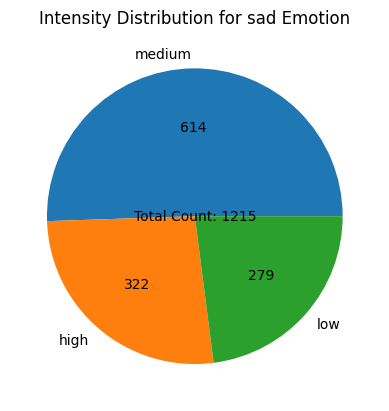

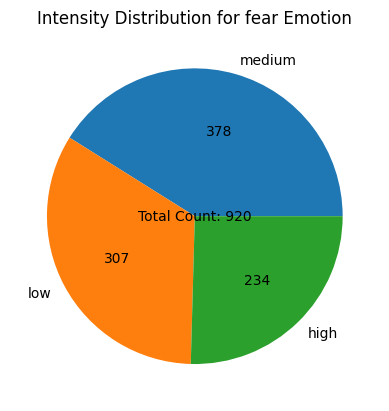

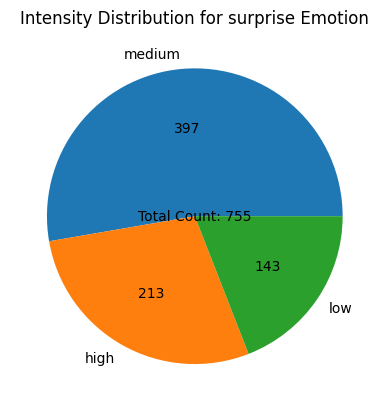

In [ ]:
emotion_counts = df["Emotion"].value_counts()
for emotion in emotion_counts.index:
    emotion_df = df[df["Emotion"] == emotion]
    intensity_counts = emotion_df["Intensity"].value_counts()
    labels = intensity_counts.index
    counts = intensity_counts.values
    plt.figure()
    plt.pie(counts, labels=labels, autopct=lambda p: f'{int(p * sum(counts) / 100)}')
    plt.title(f"Intensity Distribution for {emotion} Emotion")
    total_count = emotion_counts[emotion]
    plt.text(0.5, 0.5, f"Total Count: {total_count}", horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes)

    plt.show()


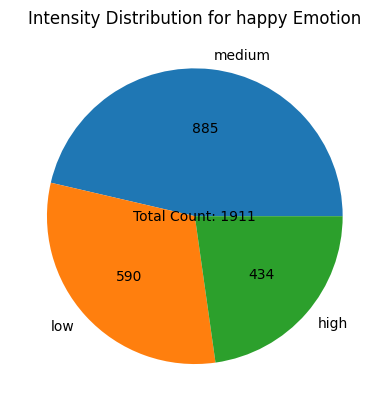

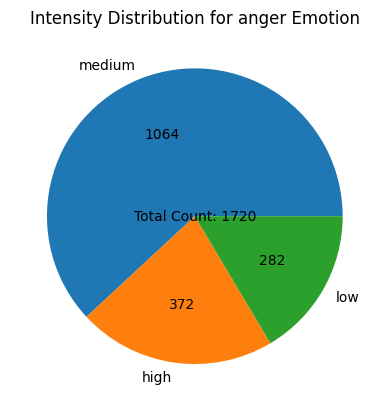

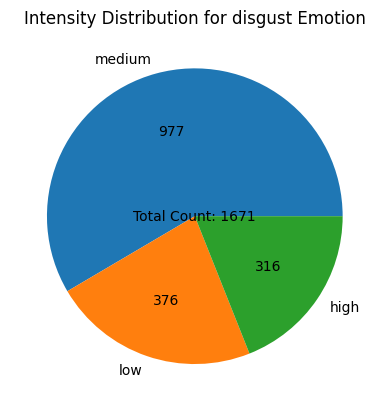

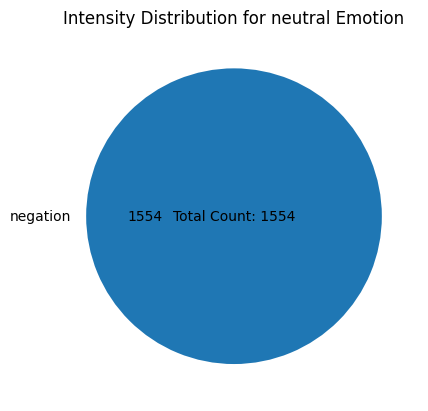

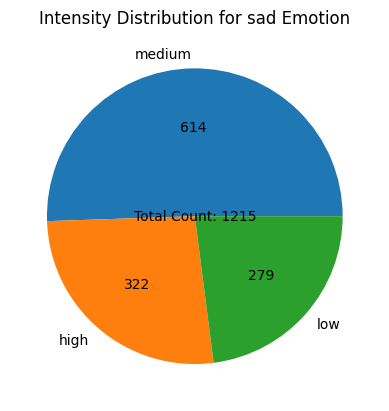

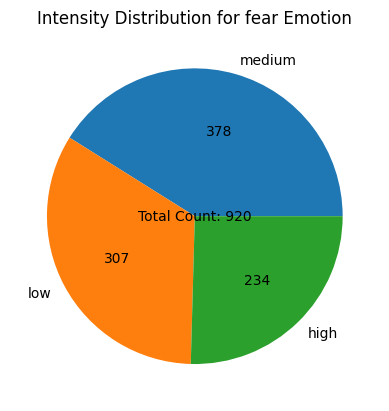

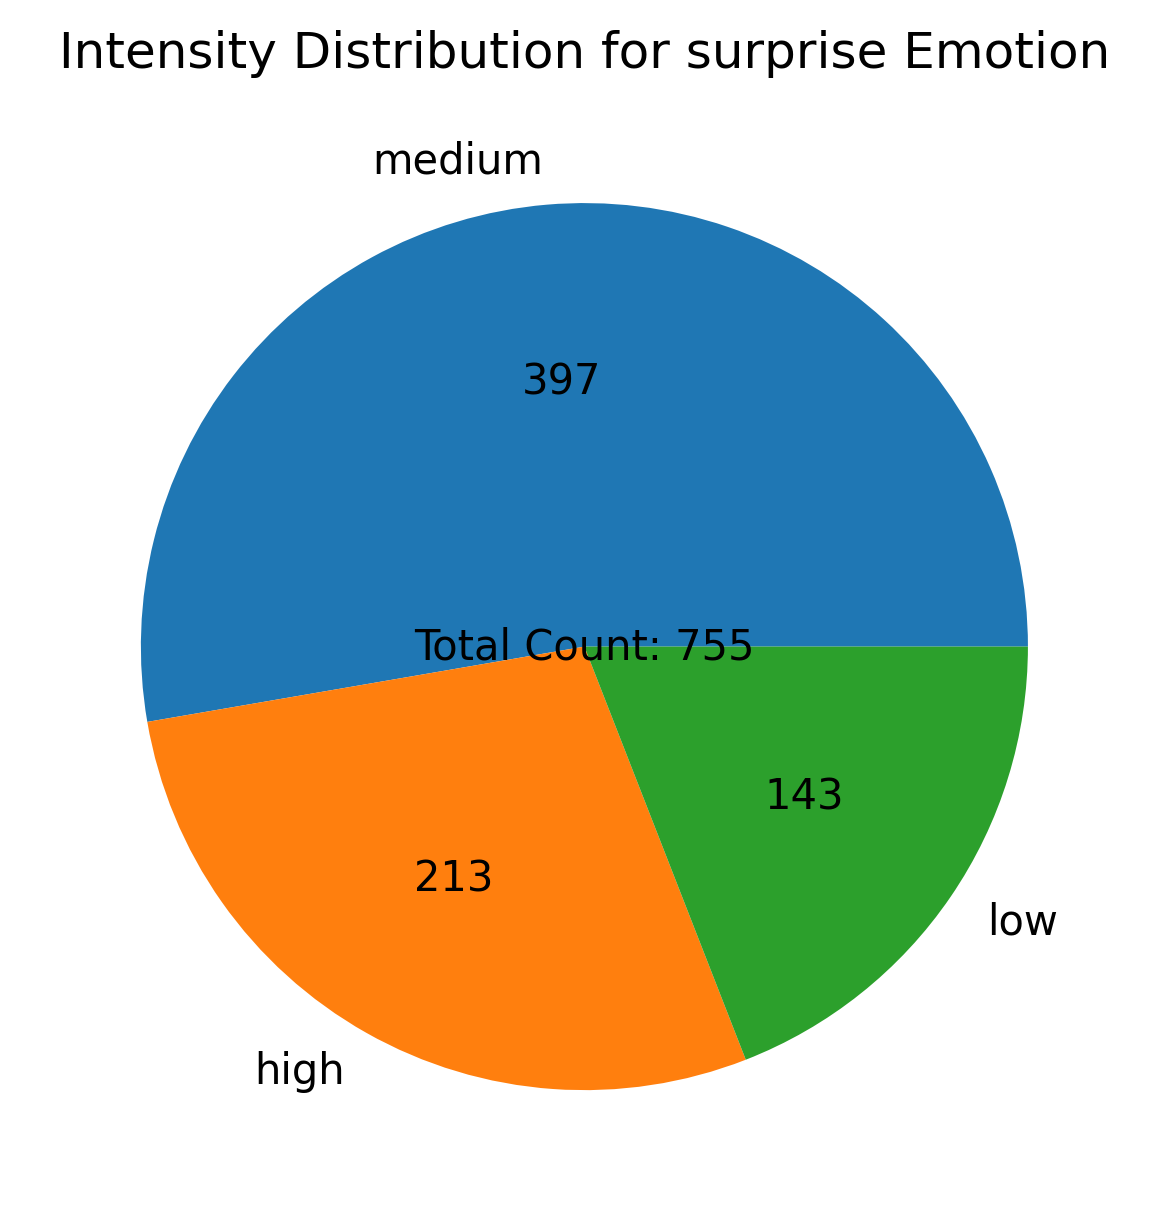

In [ ]:
emotion_counts = df["Emotion"].value_counts()

for emotion in emotion_counts.index:
    emotion_df = df[df["Emotion"] == emotion]
    intensity_counts = emotion_df["Intensity"].value_counts()
    labels = intensity_counts.index
    counts = intensity_counts.values

    plt.figure()
    plt.pie(counts, labels=labels, autopct=lambda p: f'{int(p * sum(counts) / 100)}')
    plt.title(f"Intensity Distribution for {emotion} Emotion")

    total_count = emotion_counts[emotion]
    plt.text(0.5, 0.5, f"Total Count: {total_count}", horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes)

fig = plt.gcf()
fig.set_dpi(300)  # Adjust the DPI value as needed

# Set the output file path and format
output_path = 'intensity_distribution.png'
output_format = 'png'

# Save the plot with higher DPI
plt.savefig(output_path, format=output_format, dpi=fig.get_dpi())




In [ ]:
import numpy as np

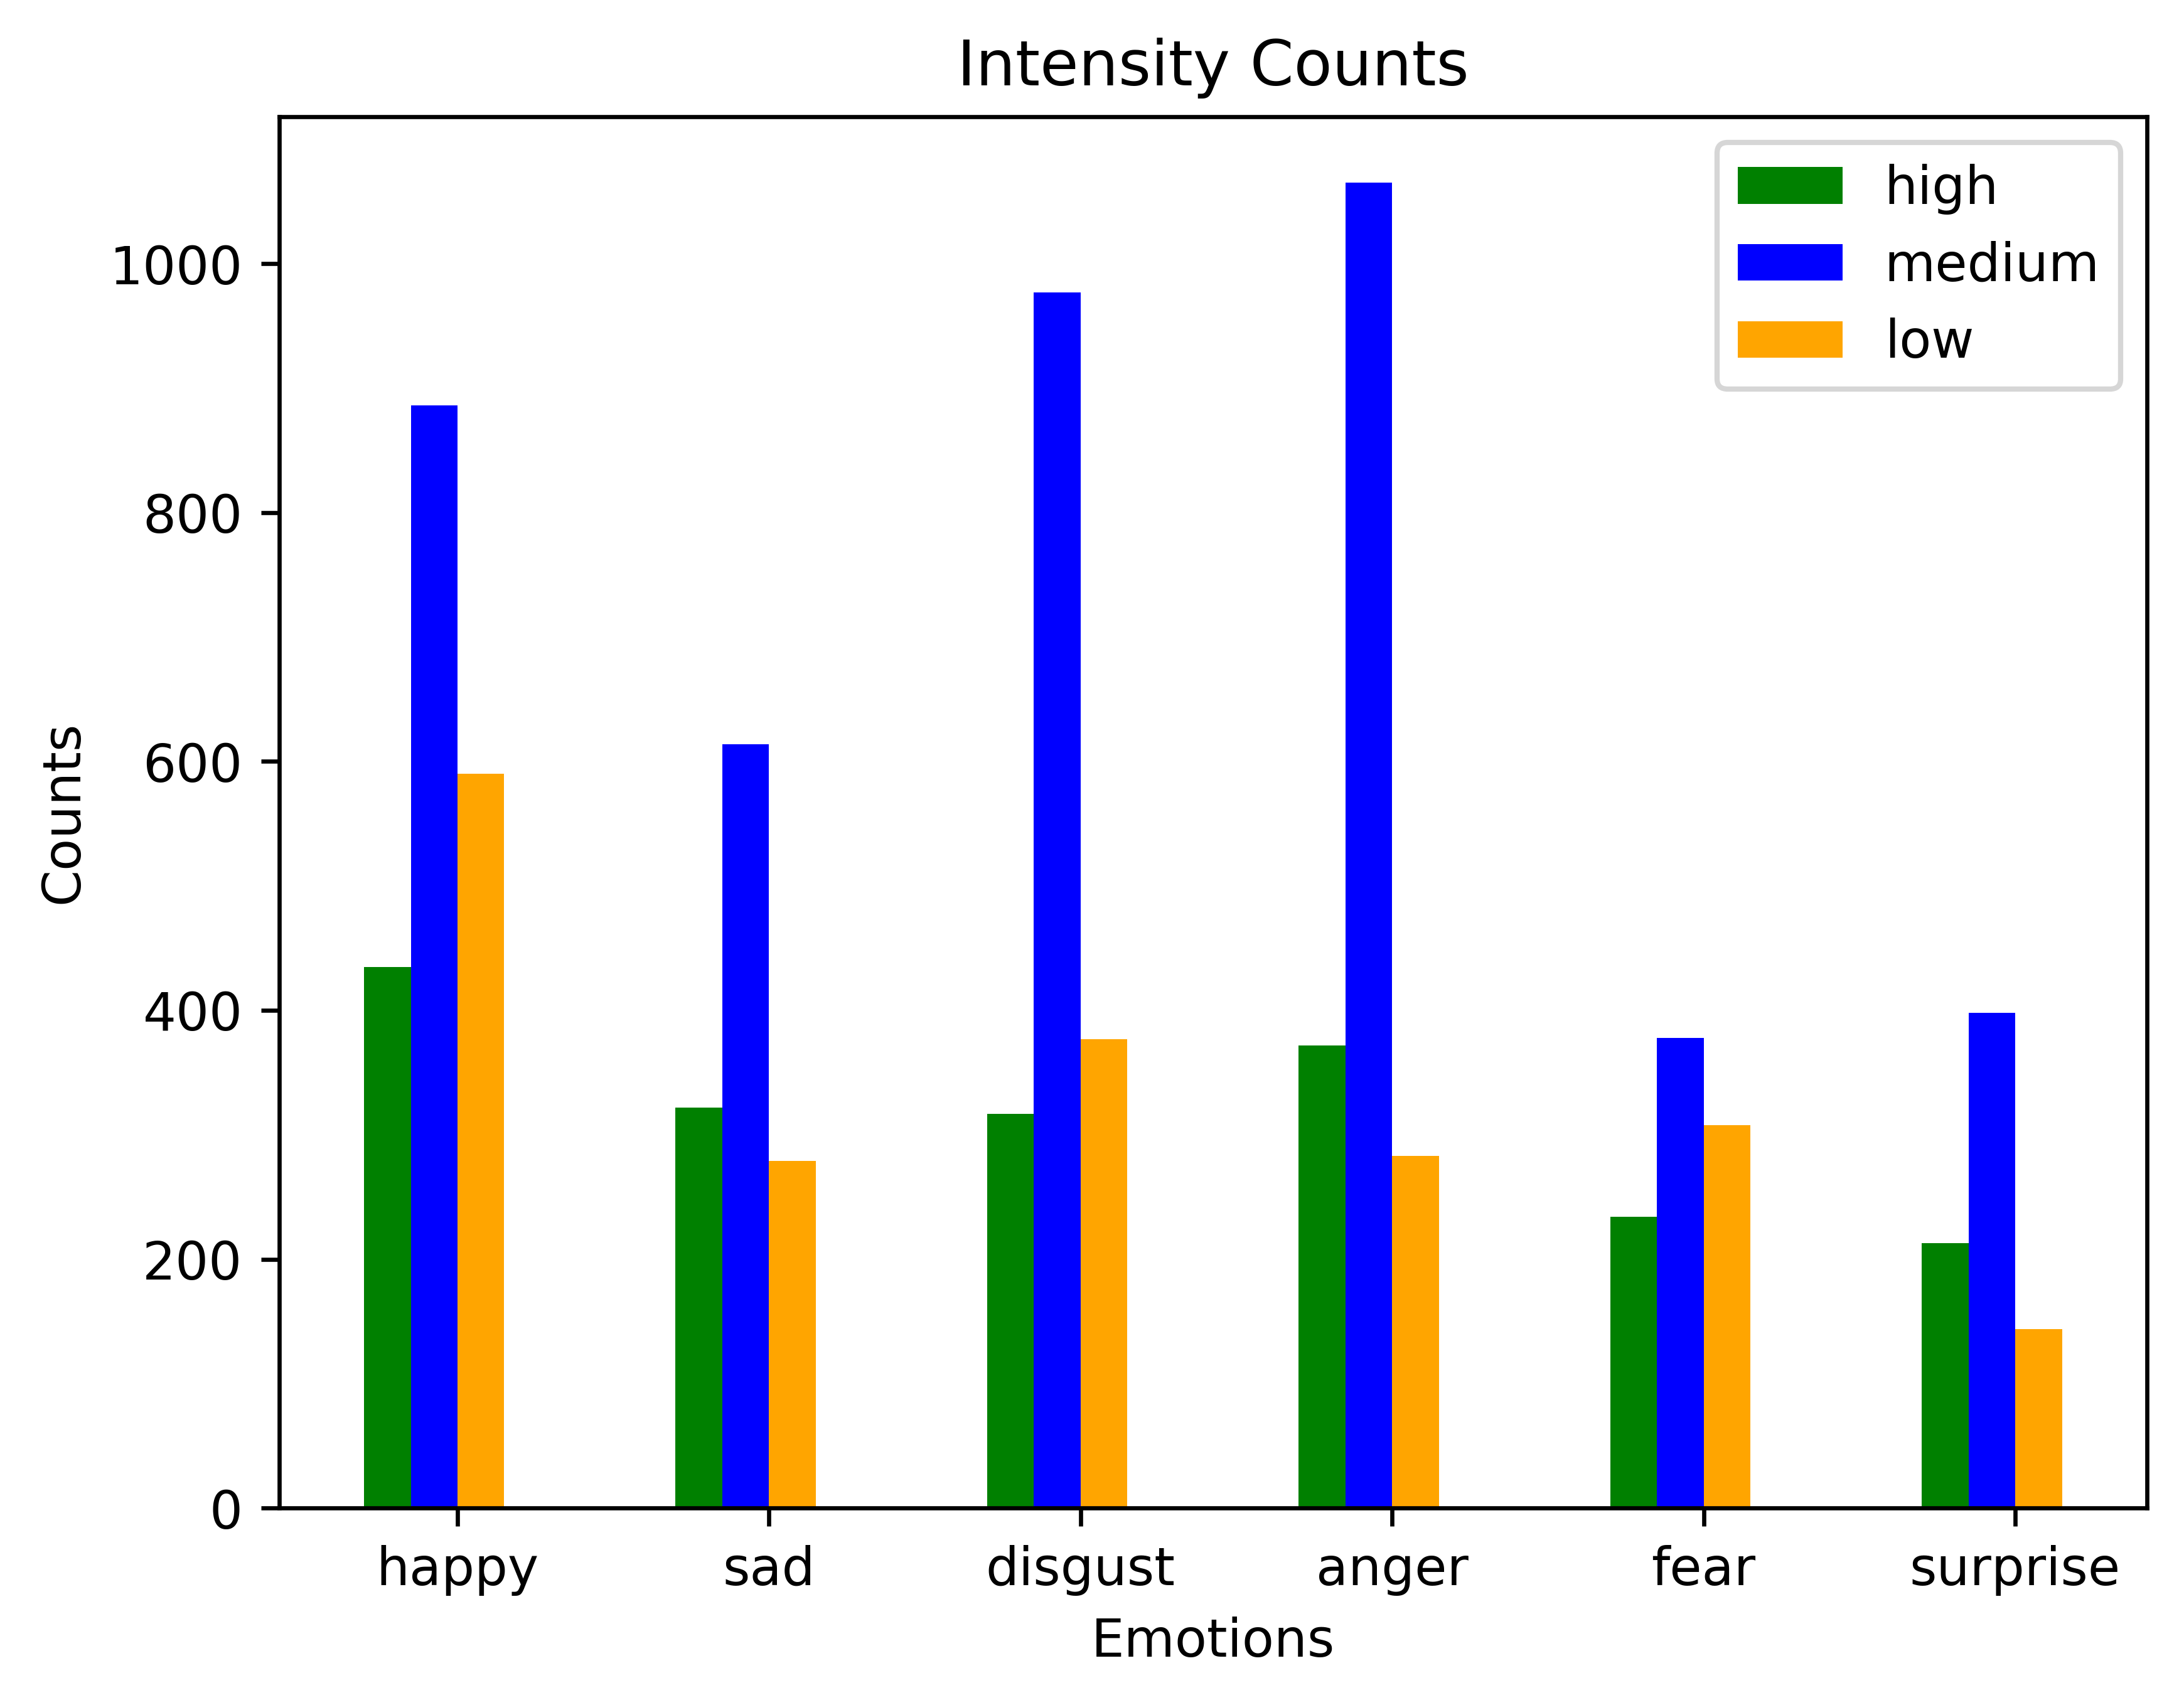

In [ ]:
# Emotions and intensities
emotions = ['happy', 'sad', 'disgust', 'anger', 'fear', 'surprise']
intensities = ['high', 'medium', 'low', 'negation']

# Calculate the intensity counts for each emotion
intensity_counts = df.groupby('Emotion')['Intensity'].value_counts().unstack().reindex(emotions, fill_value=0)

# Calculate the number of emotions
num_emotions = len(emotions)

# Set the width of each bar
bar_width = 0.15

# Set the x coordinates of the bars
index = np.arange(num_emotions)

# Set the colors for each intensity
colors = ['green', 'blue', 'orange', 'red']

# Plotting the bars
for i, intensity in enumerate(intensities):
    if intensity != 'negation':
        plt.bar(index + (i - 1.5) * bar_width, intensity_counts[intensity], bar_width, label=intensity, color=colors[i])

# Set the x-axis labels to emotions with adjusted spacing
plt.xticks(index, emotions)

# Set the title and labels for the chart
plt.title('Intensity Counts')
plt.xlabel('Emotions')
plt.ylabel('Counts')

# Add a legend
plt.legend()

# Save the chart as a high-quality image
fig = plt.gcf()
fig.set_dpi(600)  # Adjust the DPI value as needed

# Set the output file path and format
output_path = 'intensity_distribution.png'
output_format = 'png'

# Save the plot with higher DPI
plt.savefig(output_path, format=output_format, dpi=fig.get_dpi())


In [ ]:
X = df['Sentence']

In [ ]:
y_emotion = df['Emotion']

In [ ]:
y_intensity = df['Intensity']

In [ ]:
df = pd.get_dummies(df, columns=['Emotion', 'Intensity'])

In [ ]:
X_train, X_test, y_emotion_train, y_emotion_test, y_intensity_train, y_intensity_test = train_test_split(
    df['Sentence'], df[['angry', 'happy', 'Emotion_sad', 'Intensity_high', 'Intensity_low', 'Intensity_medium', 'Intensity_negation']],
    test_size=0.2, random_state=42
)

KeyError: ignored

In [ ]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
emotion_model = LogisticRegression()
emotion_model.fit(X_train_vec, y_emotion_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_emotion_pred = emotion_model.predict(X_test_vec)

In [ ]:
emotion_accuracy = accuracy_score(y_emotion_test, y_emotion_pred)

In [ ]:
print("Emotion Prediction Accuracy:", emotion_accuracy)

Emotion Prediction Accuracy: 0.6415384615384615


In [ ]:
print(classification_report(y_emotion_test, y_emotion_pred))

              precision    recall  f1-score   support

       anger       0.56      0.61      0.58       355
     disgust       0.54      0.54      0.54       336
        fear       0.60      0.67      0.63       172
       happy       0.67      0.72      0.70       370
     neutral       0.75      0.81      0.78       318
         sad       0.61      0.48      0.54       232
    surprise       0.94      0.59      0.72       167

    accuracy                           0.64      1950
   macro avg       0.67      0.63      0.64      1950
weighted avg       0.65      0.64      0.64      1950



In [ ]:
intensity_model = LogisticRegression()

In [ ]:
intensity_model.fit(X_train_vec, y_intensity_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_intensity_pred = intensity_model.predict(X_test_vec)

In [ ]:
intensity_accuracy = accuracy_score(y_intensity_test, y_intensity_pred)

In [ ]:
print("Intensity Prediction Accuracy:", intensity_accuracy)

Intensity Prediction Accuracy: 0.5728205128205128


In [ ]:
print(classification_report(y_intensity_test, y_intensity_pred))

              precision    recall  f1-score   support

        high       0.42      0.13      0.20       367
         low       0.52      0.24      0.33       387
      medium       0.54      0.85      0.66       878
    negation       0.82      0.74      0.78       318

    accuracy                           0.57      1950
   macro avg       0.58      0.49      0.49      1950
weighted avg       0.56      0.57      0.53      1950



## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
X = df['Sentence']

In [ ]:
y_emotion = df['Emotion']

In [ ]:
y_intensity = df['Intensity']

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
X_train_vec = vectorizer.fit_transform(X_train)

In [ ]:
X_test_vec = vectorizer.transform(X_test)

In [ ]:
emotion_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
emotion_model.fit(X_train_vec, y_emotion_train)

KNeighborsClassifier()

In [ ]:
y_emotion_pred = emotion_model.predict(X_test_vec)

In [ ]:
emotion_report = classification_report(y_emotion_test, y_emotion_pred)
print("Emotion Classification Report:\n", emotion_report)

Emotion Classification Report:
               precision    recall  f1-score   support

       anger       0.50      0.60      0.54       355
     disgust       0.54      0.38      0.45       336
        fear       0.51      0.69      0.59       172
       happy       0.60      0.75      0.67       370
     neutral       0.78      0.77      0.77       318
         sad       0.60      0.38      0.46       232
    surprise       0.80      0.63      0.71       167

    accuracy                           0.60      1950
   macro avg       0.62      0.60      0.60      1950
weighted avg       0.61      0.60      0.60      1950



In [ ]:
intensity_model = KNeighborsClassifier(n_neighbors=5)


In [ ]:

intensity_model.fit(X_train_vec, y_intensity_train)

KNeighborsClassifier()

In [ ]:
y_intensity_pred = intensity_model.predict(X_test_vec)

In [ ]:
intensity_report = classification_report(y_intensity_test, y_intensity_pred)
print("Intensity Classification Report:\n", intensity_report)

Intensity Classification Report:
               precision    recall  f1-score   support

        high       0.26      0.30      0.28       367
         low       0.33      0.37      0.35       387
      medium       0.55      0.51      0.53       878
    negation       0.83      0.74      0.78       318

    accuracy                           0.48      1950
   macro avg       0.49      0.48      0.48      1950
weighted avg       0.50      0.48      0.49      1950



### **SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
emotion_model = SVC(kernel='linear')
emotion_model.fit(X_train_vec, y_emotion_train)

SVC(kernel='linear')

In [ ]:
y_emotion_pred = emotion_model.predict(X_test_vec)

In [ ]:
emotion_report = classification_report(y_emotion_test, y_emotion_pred)
print("Emotion Classification Report:\n", emotion_report)

Emotion Classification Report:
               precision    recall  f1-score   support

       anger       0.55      0.63      0.59       355
     disgust       0.53      0.51      0.52       336
        fear       0.57      0.72      0.64       172
       happy       0.71      0.70      0.71       370
     neutral       0.78      0.80      0.79       318
         sad       0.58      0.52      0.55       232
    surprise       0.90      0.62      0.73       167

    accuracy                           0.64      1950
   macro avg       0.66      0.64      0.65      1950
weighted avg       0.65      0.64      0.65      1950



In [ ]:
intensity_model = SVC(kernel='linear')
intensity_model.fit(X_train_vec, y_intensity_train)

SVC(kernel='linear')

In [ ]:
y_intensity_pred = intensity_model.predict(X_test_vec)

In [ ]:
intensity_report = classification_report(y_intensity_test, y_intensity_pred)
print("Intensity Classification Report:\n", intensity_report)

Intensity Classification Report:
               precision    recall  f1-score   support

        high       0.46      0.13      0.20       367
         low       0.54      0.25      0.34       387
      medium       0.54      0.85      0.66       878
    negation       0.83      0.77      0.80       318

    accuracy                           0.58      1950
   macro avg       0.60      0.50      0.50      1950
weighted avg       0.58      0.58      0.53      1950



## **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


In [ ]:
emotion_model = MultinomialNB()
emotion_model.fit(X_train_vec, y_emotion_train)

MultinomialNB()

In [ ]:
y_emotion_pred = emotion_model.predict(X_test_vec)

In [ ]:
emotion_report = classification_report(y_emotion_test, y_emotion_pred)
print("Emotion Classification Report:\n", emotion_report)

Emotion Classification Report:
               precision    recall  f1-score   support

       anger       0.57      0.61      0.59       355
     disgust       0.53      0.58      0.55       336
        fear       0.58      0.66      0.62       172
       happy       0.58      0.76      0.66       370
     neutral       0.80      0.82      0.81       318
         sad       0.79      0.37      0.50       232
    surprise       0.98      0.49      0.65       167

    accuracy                           0.63      1950
   macro avg       0.69      0.61      0.63      1950
weighted avg       0.67      0.63      0.63      1950



In [ ]:
intensity_model = MultinomialNB()
intensity_model.fit(X_train_vec, y_intensity_train)

MultinomialNB()

In [ ]:
y_intensity_pred = intensity_model.predict(X_test_vec)

In [ ]:
intensity_report = classification_report(y_intensity_test, y_intensity_pred)
print("Intensity Classification Report:\n", intensity_report)

Intensity Classification Report:
               precision    recall  f1-score   support

        high       0.89      0.02      0.04       367
         low       0.78      0.07      0.13       387
      medium       0.49      0.98      0.66       878
    negation       0.89      0.47      0.62       318

    accuracy                           0.54      1950
   macro avg       0.76      0.39      0.36      1950
weighted avg       0.69      0.54      0.43      1950



## **Decision** **Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
emotion_model = DecisionTreeClassifier()
emotion_model.fit(X_train_vec, y_emotion_train)

DecisionTreeClassifier()

In [ ]:
y_emotion_pred = emotion_model.predict(X_test_vec)

In [ ]:
emotion_report = classification_report(y_emotion_test, y_emotion_pred)
print("Emotion Classification Report:\n", emotion_report)

Emotion Classification Report:
               precision    recall  f1-score   support

       anger       0.40      0.40      0.40       355
     disgust       0.36      0.36      0.36       336
        fear       0.45      0.51      0.48       172
       happy       0.53      0.57      0.55       370
     neutral       0.60      0.58      0.59       318
         sad       0.41      0.36      0.38       232
    surprise       0.57      0.46      0.50       167

    accuracy                           0.47      1950
   macro avg       0.47      0.46      0.47      1950
weighted avg       0.47      0.47      0.47      1950



In [ ]:
intensity_model = DecisionTreeClassifier()
intensity_model.fit(X_train_vec, y_intensity_train)

DecisionTreeClassifier()

In [ ]:
y_intensity_pred = intensity_model.predict(X_test_vec)

In [ ]:
intensity_report = classification_report(y_intensity_test, y_intensity_pred)
print("Intensity Classification Report:\n", intensity_report)

Intensity Classification Report:
               precision    recall  f1-score   support

        high       0.28      0.27      0.28       367
         low       0.34      0.35      0.35       387
      medium       0.52      0.53      0.53       878
    negation       0.58      0.59      0.58       318

    accuracy                           0.45      1950
   macro avg       0.43      0.43      0.43      1950
weighted avg       0.45      0.45      0.45      1950



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

## Random Forest

In [ ]:
emotion_rf = RandomForestClassifier()
intensity_rf = RandomForestClassifier()


In [ ]:
emotion_rf.fit(X_train_vec, y_emotion_train)
intensity_rf.fit(X_train_vec, y_intensity_train)

RandomForestClassifier()

In [ ]:
emotion_rf_predictions = emotion_rf.predict(X_test_vec)


In [ ]:
intensity_rf_predictions = intensity_rf.predict(X_test_vec)

In [ ]:
emotions = np.unique(y_emotion_test)

In [ ]:
emotion_report = classification_report(y_emotion_test, emotion_rf_predictions, target_names=emotions)

In [ ]:
intensity_report = classification_report(y_intensity_test, intensity_rf_predictions, target_names=intensities)

In [ ]:
print("Emotion Classification Report:")
print(emotion_report)

Emotion Classification Report:
              precision    recall  f1-score   support

       anger       0.48      0.61      0.54       355
     disgust       0.53      0.39      0.45       336
        fear       0.56      0.74      0.64       172
       happy       0.61      0.68      0.64       370
     neutral       0.66      0.79      0.72       318
         sad       0.67      0.36      0.47       232
    surprise       0.88      0.56      0.69       167

    accuracy                           0.59      1950
   macro avg       0.63      0.59      0.59      1950
weighted avg       0.61      0.59      0.59      1950



In [ ]:
print("Intensity Classification Report:")
print(intensity_report)

Intensity Classification Report:
              precision    recall  f1-score   support

        high       0.40      0.08      0.13       367
      medium       0.60      0.27      0.37       387
         low       0.53      0.88      0.66       878
    negation       0.78      0.61      0.69       318

    accuracy                           0.56      1950
   macro avg       0.58      0.46      0.46      1950
weighted avg       0.56      0.56      0.51      1950



In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}


In [ ]:
# Iterate over each model
for model_name, model in models.items():
    # Fit the model on the emotion task
    model.fit(X_train_vec, y_emotion_train)
    y_emotion_pred = model.predict(X_test_vec)
    emotion_accuracy = accuracy_score(y_emotion_test, y_emotion_pred)
    emotion_report = classification_report(y_emotion_test, y_emotion_pred, output_dict=True)
    emotion_reports[model_name] = pd.Series(emotion_report['weighted avg'])

    # Fit the model on the intensity task
    model.fit(X_train_vec, y_intensity_train)
    y_intensity_pred = model.predict(X_test_vec)
    intensity_accuracy = accuracy_score(y_intensity_test, y_intensity_pred)
    intensity_report = classification_report(y_intensity_test, y_intensity_pred, output_dict=True)
    intensity_reports[model_name] = pd.Series(intensity_report['weighted avg'])

    # Print the accuracy and classification reports
    print(f'{model_name} Emotion Accuracy: {emotion_accuracy}')
    print(f'{model_name} Emotion Classification Report:')
    print(classification_report(y_emotion_test, y_emotion_pred))
    print(f'{model_name} Intensity Accuracy: {intensity_accuracy}')
    print(f'{model_name} Intensity Classification Report:')
    print(classification_report(y_intensity_test, y_intensity_pred))

# Convert classification reports to tables
emotion_table_str = tabulate(emotion_reports, headers='keys', tablefmt='github')
intensity_table_str = tabulate(intensity_reports, headers='keys', tablefmt='github')

# Save the emotion classification report as a table in PNG format
plt.figure(figsize=(10, 5))
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.table(cellText=emotion_table_str.split('\n')[1:], colLabels=emotion_table_str.split('\n')[0].split('|')[1:-1], loc='center')
plt.savefig('emotion_classification_report.png', bbox_inches='tight', pad_inches=0.2)
plt.close()

# Save the intensity classification report as a table in PNG format
plt.figure(figsize=(10, 5))
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.table(cellText=intensity_table_str.split('\n')[1:], colLabels=intensity_table_str.split('\n')[0].split('|')[1:-1], loc='center')
plt.savefig('intensity_classification_report.png', bbox_inches='tight', pad_inches=0.2)
plt.close()

# Display the best models with their accuracies
best_emotion_model = emotion_reports.columns[emotion_reports.idxmax(axis=1)[0]]
highest_emotion_accuracy = emotion_reports.loc[0, best_emotion_model]
best_intensity_model = intensity_reports.columns[intensity_reports.idxmax(axis=1)[0]]
highest_intensity_accuracy = intensity_reports.loc[0, best_intensity_model]
print(f'\nEmotion Model with highest accuracy: {best_emotion_model} ({highest_emotion_accuracy})')
print(f'Intensity Model with highest accuracy: {best_intensity_model} ({highest_intensity_accuracy})')

# Load and save the classification reports as tables in PNG format
emotion_table_img = Image.open('emotion_classification_report.png')
emotion_table_img.save('emotion_classification_report_table.png')
intensity_table_img = Image.open('intensity_classification_report.png')
intensity_table_img.save('intensity_classification_report_table.png')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Emotion Accuracy: 0.6415384615384615
Logistic Regression Emotion Classification Report:
              precision    recall  f1-score   support

       anger       0.56      0.61      0.58       355
     disgust       0.54      0.54      0.54       336
        fear       0.60      0.67      0.63       172
       happy       0.67      0.72      0.70       370
     neutral       0.75      0.81      0.78       318
         sad       0.61      0.48      0.54       232
    surprise       0.94      0.59      0.72       167

    accuracy                           0.64      1950
   macro avg       0.67      0.63      0.64      1950
weighted avg       0.65      0.64      0.64      1950

Logistic Regression Intensity Accuracy: 0.5728205128205128
Logistic Regression Intensity Classification Report:
              precision    recall  f1-score   support

        high       0.42      0.13      0.20       367
         low       0.52      0.24      0.33       387
      medium       0

NameError: ignored

In [ ]:
highest_emotion_accuracy = 0
highest_intensity_accuracy = 0
best_emotion_model = ''
best_intensity_model = ''
for model_name, model in models.items():

    model.fit(X_train_vec, y_emotion_train)
    y_emotion_pred = model.predict(X_test_vec)
    emotion_accuracy = accuracy_score(y_emotion_test, y_emotion_pred)
    print(f'{model_name} Emotion Accuracy: {emotion_accuracy}')


    model.fit(X_train_vec, y_intensity_train)
    y_intensity_pred = model.predict(X_test_vec)
    intensity_accuracy = accuracy_score(y_intensity_test, y_intensity_pred)
    print(f'{model_name} Intensity Accuracy: {intensity_accuracy}')


    if emotion_accuracy > highest_emotion_accuracy:
        highest_emotion_accuracy = emotion_accuracy
        best_emotion_model = model_name


    if intensity_accuracy > highest_intensity_accuracy:
        highest_intensity_accuracy = intensity_accuracy
        best_intensity_model = model_name


print(f'\nEmotion Model with highest accuracy: {best_emotion_model} ({highest_emotion_accuracy})')
print(f'Intensity Model with highest accuracy: {best_intensity_model} ({highest_intensity_accuracy})')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Emotion Accuracy: 0.6415384615384615


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Intensity Accuracy: 0.5728205128205128
K-Nearest Neighbors Emotion Accuracy: 0.602051282051282
K-Nearest Neighbors Intensity Accuracy: 0.4774358974358974
Support Vector Machine Emotion Accuracy: 0.6461538461538462
Support Vector Machine Intensity Accuracy: 0.5923076923076923
Naive Bayes Emotion Accuracy: 0.6348717948717949
Naive Bayes Intensity Accuracy: 0.5353846153846153
Decision Tree Emotion Accuracy: 0.47692307692307695
Decision Tree Intensity Accuracy: 0.4584615384615385
Random Forest Emotion Accuracy: 0.5943589743589743
Random Forest Intensity Accuracy: 0.5666666666666667

Emotion Model with highest accuracy: Support Vector Machine (0.6461538461538462)
Intensity Model with highest accuracy: Support Vector Machine (0.5923076923076923)


In [ ]:
from sklearn.metrics import classification_report

highest_emotion_accuracy = 0
highest_intensity_accuracy = 0
best_emotion_model = ''
best_intensity_model = ''

for model_name, model in models.items():

    model.fit(X_train_vec, y_emotion_train)
    y_emotion_pred = model.predict(X_test_vec)
    emotion_accuracy = accuracy_score(y_emotion_test, y_emotion_pred)
    emotion_report = classification_report(y_emotion_test, y_emotion_pred)
    print(f'{model_name} Emotion Accuracy: {emotion_accuracy}')
    print(f'{model_name} Emotion Classification Report:')
    print(emotion_report)

    model.fit(X_train_vec, y_intensity_train)
    y_intensity_pred = model.predict(X_test_vec)
    intensity_accuracy = accuracy_score(y_intensity_test, y_intensity_pred)
    intensity_report = classification_report(y_intensity_test, y_intensity_pred)
    print(f'{model_name} Intensity Accuracy: {intensity_accuracy}')
    print(f'{model_name} Intensity Classification Report:')
    print(intensity_report)

    if emotion_accuracy > highest_emotion_accuracy:
        highest_emotion_accuracy = emotion_accuracy
        best_emotion_model = model_name

    if intensity_accuracy > highest_intensity_accuracy:
        highest_intensity_accuracy = intensity_accuracy
        best_intensity_model = model_name

print(f'\nEmotion Model with highest accuracy: {best_emotion_model} ({highest_emotion_accuracy})')
print(f'Intensity Model with highest accuracy: {best_intensity_model} ({highest_intensity_accuracy})')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Emotion Accuracy: 0.6415384615384615
Logistic Regression Emotion Classification Report:
              precision    recall  f1-score   support

       anger       0.56      0.61      0.58       355
     disgust       0.54      0.54      0.54       336
        fear       0.60      0.67      0.63       172
       happy       0.67      0.72      0.70       370
     neutral       0.75      0.81      0.78       318
         sad       0.61      0.48      0.54       232
    surprise       0.94      0.59      0.72       167

    accuracy                           0.64      1950
   macro avg       0.67      0.63      0.64      1950
weighted avg       0.65      0.64      0.64      1950



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Intensity Accuracy: 0.5728205128205128
Logistic Regression Intensity Classification Report:
              precision    recall  f1-score   support

        high       0.42      0.13      0.20       367
         low       0.52      0.24      0.33       387
      medium       0.54      0.85      0.66       878
    negation       0.82      0.74      0.78       318

    accuracy                           0.57      1950
   macro avg       0.58      0.49      0.49      1950
weighted avg       0.56      0.57      0.53      1950

K-Nearest Neighbors Emotion Accuracy: 0.602051282051282
K-Nearest Neighbors Emotion Classification Report:
              precision    recall  f1-score   support

       anger       0.50      0.59      0.54       355
     disgust       0.54      0.38      0.45       336
        fear       0.52      0.69      0.59       172
       happy       0.60      0.75      0.67       370
     neutral       0.77      0.77      0.77       318
         sad       0.

# Deep Learning Models

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

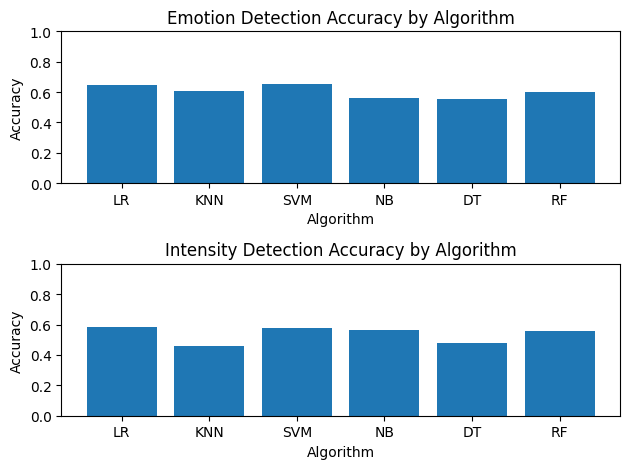

In [ ]:
import matplotlib.pyplot as plt

algorithm_names = [
    "LR",
    "KNN",
    "SVM",
    "NB",
    "DT",
    "RF"
]

emotion_accuracies = [
    0.6493174287607687,
    0.607687210072896,
    0.6555202120609675,
    0.558648111332008,
    0.5556328694499669,
    0.6012792753294268
]

intensity_accuracies = [
    0.5859377070907886,
    0.4592445328031809,
    0.5759973492379059,
    0.5659377070907886,
    0.4780384360503644,
    0.5574358974358974
]

plt.subplot(2, 1, 1)
plt.bar(algorithm_names, emotion_accuracies)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Emotion Detection Accuracy by Algorithm')
plt.ylim(0, 1)

plt.subplot(2, 1, 2)
plt.bar(algorithm_names, intensity_accuracies)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Intensity Detection Accuracy by Algorithm')
plt.ylim(0, 1)

plt.tight_layout()
output_path = "accuracy_plot.png"
output_format = 'png'
plt.savefig(output_path, format=output_format, dpi=600)
from google.colab import files
files.download(output_path)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Emotion Accuracy: 0.6415384615384615
Logistic Regression Emotion Classification Report:
              precision    recall  f1-score   support

       anger       0.56      0.61      0.58       355
     disgust       0.54      0.54      0.54       336
        fear       0.60      0.67      0.63       172
       happy       0.67      0.72      0.70       370
     neutral       0.75      0.81      0.78       318
         sad       0.61      0.48      0.54       232
    surprise       0.94      0.59      0.72       167

    accuracy                           0.64      1950
   macro avg       0.67      0.63      0.64      1950
weighted avg       0.65      0.64      0.64      1950

Logistic Regression Intensity Accuracy: 0.5728205128205128
Logistic Regression Intensity Classification Report:
              precision    recall  f1-score   support

        high       0.42      0.13      0.20       367
         low       0.52      0.24      0.33       387
      medium       0

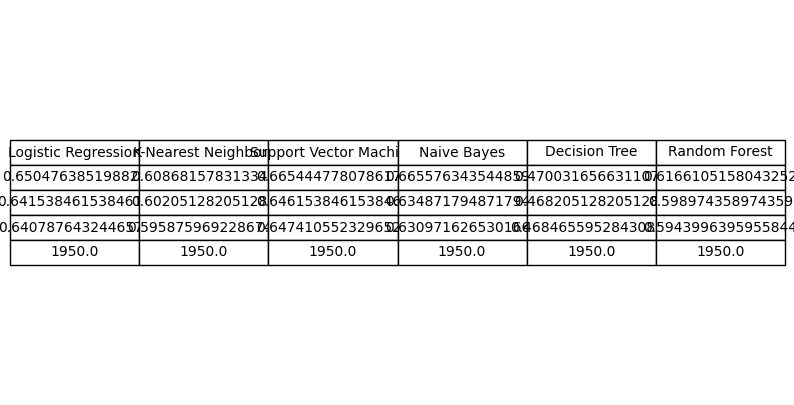

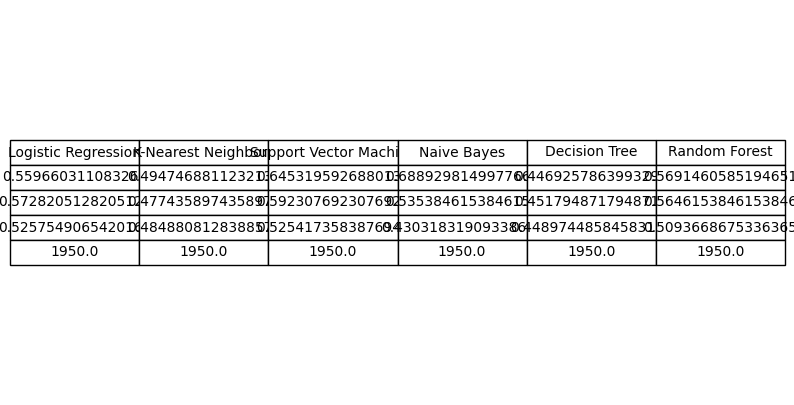

In [ ]:
# Initialize empty DataFrames to store the classification reports
emotion_reports = pd.DataFrame()
intensity_reports = pd.DataFrame()


# Iterate over each model
for model_name, model in models.items():
    # Fit the model on the emotion task
    model.fit(X_train_vec, y_emotion_train)
    y_emotion_pred = model.predict(X_test_vec)
    emotion_accuracy = accuracy_score(y_emotion_test, y_emotion_pred)
    emotion_report = classification_report(y_emotion_test, y_emotion_pred, output_dict=True)
    emotion_reports[model_name] = pd.Series(emotion_report['weighted avg'])

    # Fit the model on the intensity task
    model.fit(X_train_vec, y_intensity_train)
    y_intensity_pred = model.predict(X_test_vec)
    intensity_accuracy = accuracy_score(y_intensity_test, y_intensity_pred)
    intensity_report = classification_report(y_intensity_test, y_intensity_pred, output_dict=True)
    intensity_reports[model_name] = pd.Series(intensity_report['weighted avg'])

    # Print the accuracy and classification reports
    print(f'{model_name} Emotion Accuracy: {emotion_accuracy}')
    print(f'{model_name} Emotion Classification Report:')
    print(classification_report(y_emotion_test, y_emotion_pred))
    print(f'{model_name} Intensity Accuracy: {intensity_accuracy}')
    print(f'{model_name} Intensity Classification Report:')
    print(classification_report(y_intensity_test, y_intensity_pred))

# Save the emotion classification report as a table in PNG format
plt.figure(figsize=(10, 5))
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
emotion_table = plt.table(cellText=emotion_reports.values, colLabels=emotion_reports.columns, cellLoc='center', loc='center')
emotion_table.auto_set_font_size(False)
emotion_table.set_fontsize(10)
emotion_table.scale(1, 1.5)
plt.savefig('emotion_classification_report.png', bbox_inches='tight', pad_inches=0.2)

# Save the intensity classification report as a table in PNG format
plt.figure(figsize=(10, 5))
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
intensity_table = plt.table(cellText=intensity_reports.values, colLabels=intensity_reports.columns, cellLoc='center', loc='center')
intensity_table.auto_set_font_size(False)
intensity_table.set_fontsize(10)
intensity_table.scale(1, 1.5)
plt.savefig('intensity_classification_report.png', bbox_inches='tight', pad_inches=0.2)

# Display the best models with their accuracies
print(f'\nEmotion Model with highest accuracy: {best_emotion_model} ({highest_emotion_accuracy})')
print(f'Intensity Model with highest accuracy: {best_intensity_model} ({highest_intensity_accuracy})')


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from tabulate import tabulate

# Initialize empty DataFrames to store the classification reports
emotion_reports = {}
intensity_reports = {}

# Iterate over each model
for model_name, model in models.items():
    # Fit the model on the emotion task
    model.fit(X_train_vec, y_emotion_train)
    y_emotion_pred = model.predict(X_test_vec)
    emotion_accuracy = accuracy_score(y_emotion_test, y_emotion_pred)
    emotion_report = classification_report(y_emotion_test, y_emotion_pred, output_dict=True)
    emotion_reports[model_name] = emotion_report

    # Fit the model on the intensity task
    model.fit(X_train_vec, y_intensity_train)
    y_intensity_pred = model.predict(X_test_vec)
    intensity_accuracy = accuracy_score(y_intensity_test, y_intensity_pred)
    intensity_report = classification_report(y_intensity_test, y_intensity_pred, output_dict=True)
    intensity_reports[model_name] = intensity_report

    # Print the accuracy and classification reports
    print(f'{model_name} Emotion Accuracy: {emotion_accuracy}')
    print(f'{model_name} Emotion Classification Report:')
    print(classification_report(y_emotion_test, y_emotion_pred))
    print(f'{model_name} Intensity Accuracy: {intensity_accuracy}')
    print(f'{model_name} Intensity Classification Report:')
    print(classification_report(y_intensity_test, y_intensity_pred))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Emotion Accuracy: 0.6415384615384615
Logistic Regression Emotion Classification Report:
              precision    recall  f1-score   support

       anger       0.56      0.61      0.58       355
     disgust       0.54      0.54      0.54       336
        fear       0.60      0.67      0.63       172
       happy       0.67      0.72      0.70       370
     neutral       0.75      0.81      0.78       318
         sad       0.61      0.48      0.54       232
    surprise       0.94      0.59      0.72       167

    accuracy                           0.64      1950
   macro avg       0.67      0.63      0.64      1950
weighted avg       0.65      0.64      0.64      1950

Logistic Regression Intensity Accuracy: 0.5728205128205128
Logistic Regression Intensity Classification Report:
              precision    recall  f1-score   support

        high       0.42      0.13      0.20       367
         low       0.52      0.24      0.33       387
      medium       0